<img data-cy="WrapperImage" src="https://uipath.com/cdn-cgi/image/width=900,format=auto/https:////images.ctfassets.net/5965pury2lcm/49NUuv9jQZsQTE5QBPe1lJ/e3c6846e1312f59d045aac5a62fb2198/Insurance.jpg" alt="Insurance" class="BlogPost__Image" loading="lazy" width="800" height="600">


# Seguradora Auto  - Auto Insurance dataset (still in progress) 
## (banco de dados retirados do Kaggle)

https://www.kaggle.com/datasets/rupakroy/auto-insurance

### Passo a passo desse projeto de dados :

1. Conhecer o banco de dados
2. Entendimento sobre a análise financeira no mercado de seguros
3. Entendimento sobre os principais indicadores do setor de seguros
4. Adoção de estratégias para geração de insights
5. Extração/Obtenção de dados - Kaggle
6. Ajuste de dados (tratamento/limpeza)
7. Filtragem dos dados 
8. Análise exploratória

### INTRODUÇÃO
#### (introdução sobre seguradoras, panorama e tipo de análise)

   * Fundamentos quantitativos: São aqueles que são medidos em números (os dados para esse projeto estão inseridos nessa categoria).

   * Fundamentos Qualitativos: São fatores internos e externos que podem contribuir com a rentabilidade e crescimento da empresa, favorecendo seus ganhos financeiros, mas que também podem levar uma empresa ao prejuízo.

Estratégias a serem utilizadas para geração de Insights

* Total de Apólices por tipo de cobertura 
* Quantidade de  Clientes por Estado
* Identificar quais são os produtos com mais clientes;
* Identificar quais são os setores que tem um maior retorno;
* Identificar quais são os Estados com mais clientes;
* Quais topos de cobertura 
* Análise da variável 'Response', quais clientes possuem outro produto( ex. seguro de vida)
* Receita mensal, por estado, gênero;
* Media de meses desde último acionamento por gênero
* Total de apólices por canal de venda
* Analise da frequência da variavel 'Response', com a finalidade de saber: Quem possui ou não seguro Saúde
   85% do dataset não ainda pode ser prospectado.
 

In [1]:
#Importando os módulos 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib

In [2]:
#Carregando o dataset com colunas pré-selecionadas
auto = pd.read_csv('AutoInsurance.csv', sep = ',', usecols=['Customer','State','EmploymentStatus', 'Customer Lifetime Value', 'Response','Coverage', 'Gender', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Number of Policies', 'SalesChannel', 'Total Claim Amount', 'VehicleClass', 'Months Since Policy Inception'])
auto.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,EmploymentStatus,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,SalesChannel,Total Claim Amount,VehicleClass
0,BU79786,Washington,2763.519279,No,Basic,Employed,F,56274,69,32,5,1,Agent,384.811147,Two-Door Car
1,QZ44356,Arizona,6979.535903,No,Extended,Unemployed,F,0,94,13,42,8,Agent,1131.464935,Four-Door Car
2,AI49188,Nevada,12887.431650,No,Premium,Employed,F,48767,108,18,38,2,Agent,566.472247,Two-Door Car
3,WW63253,California,7645.861827,No,Basic,Unemployed,M,0,106,18,65,7,Call Center,529.881344,SUV
4,HB64268,Washington,2813.692575,No,Basic,Employed,M,43836,73,12,44,1,Agent,138.130879,Four-Door Car


In [3]:
# Renomeando algumas colunas
auto = auto.rename(columns={'Customer':'Cliente','State':'Estado','Customer Lifetime Value':'Valor Vitalício Pgo','Response':'Response','Coverage':'Cobertura','EmploymentStatus':'Status de Trabalho','Gender':'Genero','Income':'Salário','Monthly Premium Auto':'Valor Pagto Mensal',
'Months Since Last Claim':'Meses último Sinistro','Months Since Policy Inception':'Tempo de Apólice','Number of Policies':'Número de Apólices','SalesChannel':'Canal de Venda','Total Claim Amount':'Valor Total Sinistro','VehicleClass':'Categoria Veículo'})

In [4]:
#visualizando dados
auto.head(1)

,Cliente,Estado,Valor Vitalício Pgo,Response,Cobertura,Status de Trabalho,Genero,Salário,Valor Pagto Mensal,Meses último Sinistro,Tempo de Apólice,Número de Apólices,Canal de Venda,Valor Total Sinistro,Categoria Veículo
0,BU79786,Washington,2763.519279,No,Basic,Employed,F,56274,69,32,5,1,Agent,384.811147,Two-Door Car


In [5]:
#Recodificação da variável "Response": de (yes/no) para (1,0)
condicoes=[auto["Response"]=="Yes",auto["Response"]=="No"]
classe=[1,0]
auto["Response_nu"] = np.select(condicoes, classe, default="Sem Info")
auto = auto.drop("Response", axis=1)
auto.head()

,Cliente,Estado,Valor Vitalício Pgo,Cobertura,Status de Trabalho,Genero,Salário,Valor Pagto Mensal,Meses último Sinistro,Tempo de Apólice,Número de Apólices,Canal de Venda,Valor Total Sinistro,Categoria Veículo,Response_nu
0,BU79786,Washington,2763.519279,Basic,Employed,F,56274,69,32,5,1,Agent,384.811147,Two-Door Car,0
1,QZ44356,Arizona,6979.535903,Extended,Unemployed,F,0,94,13,42,8,Agent,1131.464935,Four-Door Car,0
2,AI49188,Nevada,12887.431650,Premium,Employed,F,48767,108,18,38,2,Agent,566.472247,Two-Door Car,0
3,WW63253,California,7645.861827,Basic,Unemployed,M,0,106,18,65,7,Call Center,529.881344,SUV,0
4,HB64268,Washington,2813.692575,Basic,Employed,M,43836,73,12,44,1,Agent,138.130879,Four-Door Car,0


<AxesSubplot:>

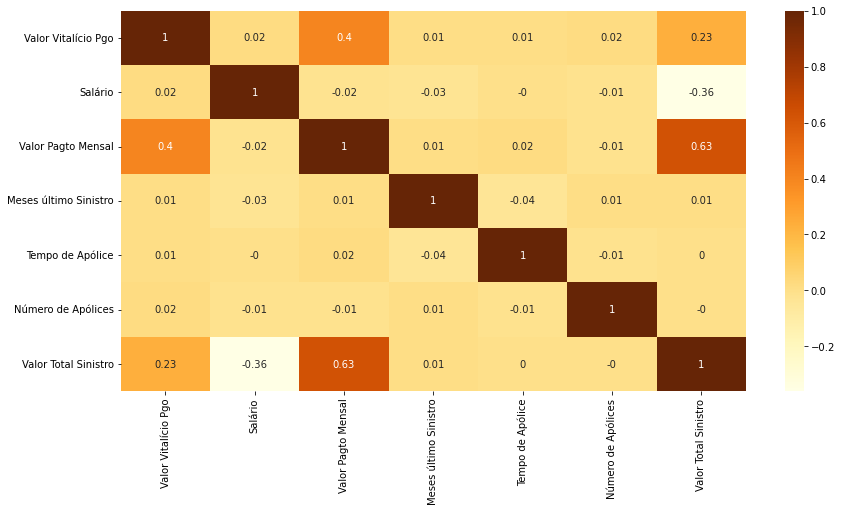

In [73]:
# verificando correlação entre variaveis

correlation = auto.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [6]:
#checando por valores nulos
print(auto.isnull().sum())

Cliente                  0
Estado                   0
Valor Vitalício Pgo      0
Cobertura                0
Status de Trabalho       0
Genero                   0
Salário                  0
Valor Pagto Mensal       0
Meses último Sinistro    0
Tempo de Apólice         0
Número de Apólices       0
Canal de Venda           0
Valor Total Sinistro     0
Categoria Veículo        0
Response_nu              0
dtype: int64


In [7]:
# Dtypes
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cliente                9134 non-null   object 
 1   Estado                 9134 non-null   object 
 2   Valor Vitalício Pgo    9134 non-null   float64
 3   Cobertura              9134 non-null   object 
 4   Status de Trabalho     9134 non-null   object 
 5   Genero                 9134 non-null   object 
 6   Salário                9134 non-null   int64  
 7   Valor Pagto Mensal     9134 non-null   int64  
 8   Meses último Sinistro  9134 non-null   int64  
 9   Tempo de Apólice       9134 non-null   int64  
 10  Número de Apólices     9134 non-null   int64  
 11  Canal de Venda         9134 non-null   object 
 12  Valor Total Sinistro   9134 non-null   float64
 13  Categoria Veículo      9134 non-null   object 
 14  Response_nu            9134 non-null   object 
dtypes: f

In [48]:
# Medidas de posição - Estatística descritiva. Variaveis numéricas e qualitativas
auto.describe()

,Valor Vitalício Pgo,Salário,Valor Pagto Mensal,Meses último Sinistro,Tempo de Apólice,Número de Apólices,Valor Total Sinistro
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,9.000000,2893.239678


In [74]:
# Análise descritiva _ Pagam em média $94 dólares por mês
auto[["Valor Pagto Mensal"]].describe()

,Valor Pagto Mensal
count,9134.000000
mean,93.219291
std,34.407967
min,61.000000
25%,68.000000
50%,83.000000
75%,109.000000
max,298.000000


In [75]:
# Total de apólices por tipo de cobertura
Qtd_apol_cobert = auto.groupby("Cobertura")[["Cliente"]].count()
Qtd_apol_cobert

,Cliente
Cobertura,
Basic,5568
Extended,2742
Premium,824


In [10]:
# Total de apólices por canal de vendas
num_apol_canal = auto.groupby("Canal de Venda")[["Número de Apólices"]].count()
num_apol_canal

,Número de Apólices
Canal de Venda,
Agent,3477
Branch,2567
Call Center,1765
Web,1325


<AxesSubplot:ylabel='Número de Apólices'>

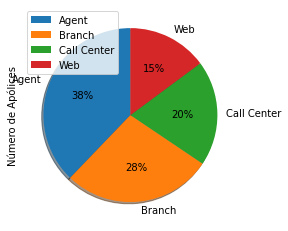

In [71]:
auto.groupby(['Canal de Venda']).sum().plot(kind='pie', y='Número de Apólices', autopct='%1.0f%%', shadow=True,startangle=90)


<AxesSubplot:xlabel='Número de Apólices', ylabel='Density'>

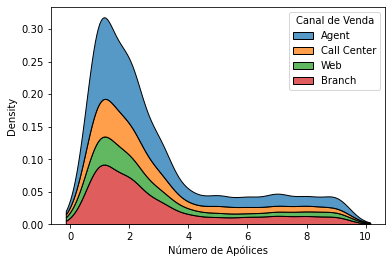

In [11]:
sns.kdeplot(data=auto, x="Número de Apólices", hue="Canal de Venda", multiple="stack")

In [105]:
#Quantidade de  Clientes por Estado 
auto["Estado"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: Estado, dtype: int64

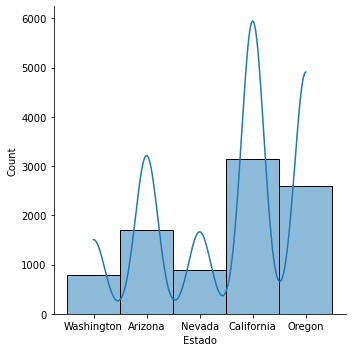

In [52]:
#CLientes por estado
sns.displot(data=auto, x="Estado", kde=True)


In [15]:
# Media de meses desde último acionamento por gênero

media_meses_aciona = auto.groupby("Genero")[["Meses último Sinistro"]].mean()
media_meses_aciona

,Meses último Sinistro
Genero,
F,14.844998
M,15.359249


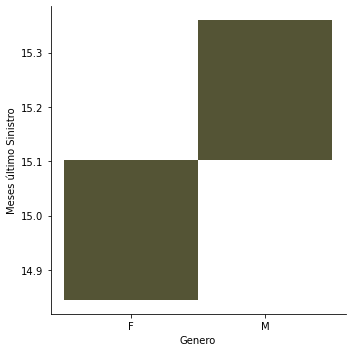

In [58]:
# plot bivariado
sns.displot(data=media_meses_aciona , x="Genero", y="Meses último Sinistro", color="y")

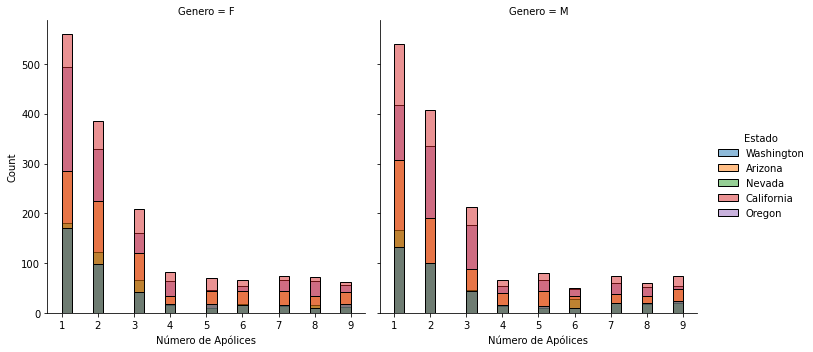

In [61]:
sns.displot(data=auto, x="Número de Apólices", hue="Estado", col="Genero")

In [66]:
# Produtos por Gênero
auto.groupby("Genero")[["Número de Apólices"]].count()

,Número de Apólices
Genero,
F,4658
M,4476


In [31]:
#Análise bivariada gênero/cobertura
pd.crosstab(auto.Cobertura, auto.Genero, normalize='index')

Genero,F,M
Cobertura,,
Basic,0.503053,0.496947
Extended,0.522247,0.477753
Premium,0.515777,0.484223


In [69]:
#Analise da frequência da variavel 'Response', com a finalidade de saber: Quem possui ou não seguro Saúde
#85% do dataset não ainda pode ser prospectado.
frequencia = auto['Response_nu'].value_counts()
frequencia
percentual =  auto['Response_nu'].value_counts(normalize = True)*100
percentual
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq

,Frequência,Porcentagem(%)
0,7826,85.679877
1,1308,14.320123


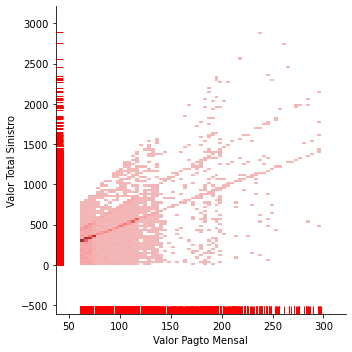

In [34]:
# cruzamento das váriaveis correlacionadas = "Valor Pagto Mensal","Valor Total Sinistro"

sns.displot(data=auto, x="Valor Pagto Mensal", y="Valor Total Sinistro", palette="Dark2", color="red", rug="True")

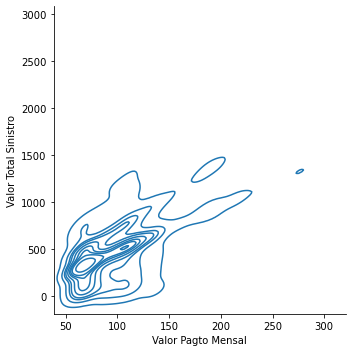

In [68]:
#correlação 
sns.displot(data=auto, x="Valor Pagto Mensal", y="Valor Total Sinistro", kind="kde")

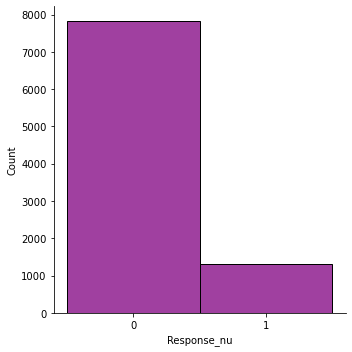

In [37]:
# Variável Response - Cliente possuí ou não outro produto de seguro ( ex. Vida ou saúde)
sns.displot(auto['Response_nu'], color="purple")

In [38]:
auto[["Número de Apólices"]].describe()

,Número de Apólices
count,9134.000000
mean,2.966170
std,2.390182
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9.000000


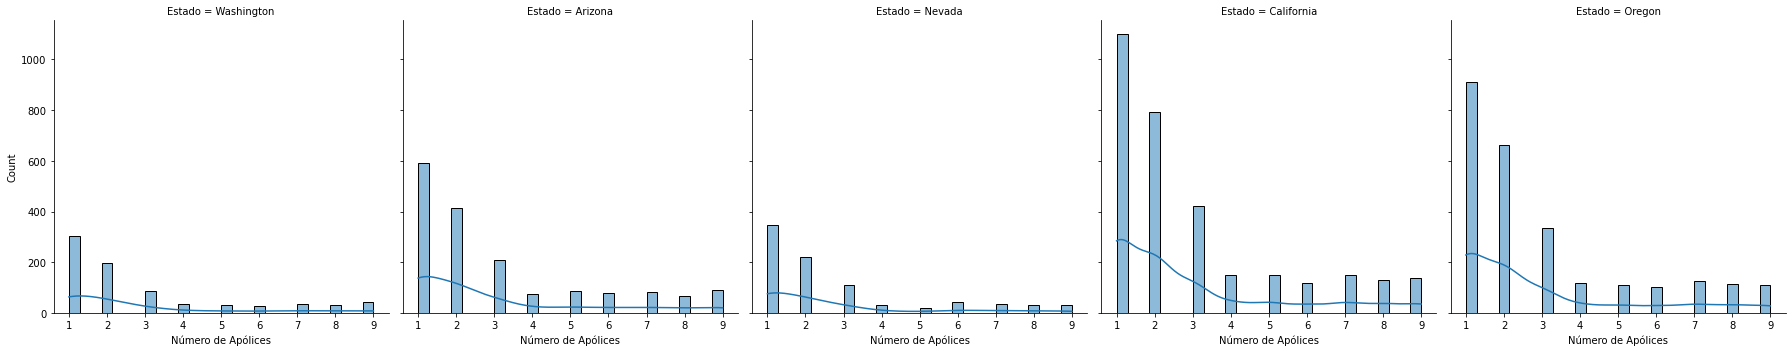

In [39]:
sns.displot(data=auto, x="Número de Apólices", col="Estado", kde=True)

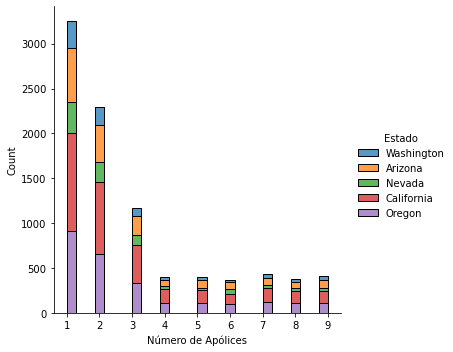

In [45]:

sns.displot(data=auto, x="Número de Apólices", hue="Estado", multiple="stack")

In [ ]:
#Exportando o resultado para o excel
nome_arquivo = 'saidaauto1.xlsx'
auto .to_csv(nome_arquivo)
print('DataFrame exportado com sucesso.')